In [83]:
import abtem
from abtem.core.ensemble import concatenate_array_blocks
import matplotlib.pyplot as plt
import numpy as np

from ase import Atoms

In [108]:
abtem.Probe(energy=300e3, extent=20, gpts=128, semiangle_cutoff=20).build().compute().diffraction_patterns().sum()

[########################################] | 100% Completed |  0.1s


1.0

In [112]:
abtem.SMatrix(energy=100e3, extent=20, gpts=128, semiangle_cutoff=20).reduce().compute().diffraction_patterns().sum()

[########################################] | 100% Completed |  0.8s


0.99999964

In [103]:
atoms = Atoms('CSiCuAuU', positions=[(x, 25, 4) for x in np.linspace(5, 45, 5)], cell=(50, 50, 8))

potential = abtem.Potential(atoms=atoms, gpts=512, parametrization='kirkland', projection="infinite")
waves = abtem.PlaneWave(energy=200e3)

waves = waves.multislice(potential, lazy=True)

#waves.show(power=.01, cbar=True)

waves = waves.apply_ctf(defocus=700, Cs=1.3e7, semiangle_cutoff=10.37, soft=True)

#waves.show()

intensity = waves.intensity().compute().array

[########################################] | 100% Completed |  0.6s


In [106]:
intensity.max()

1.029505

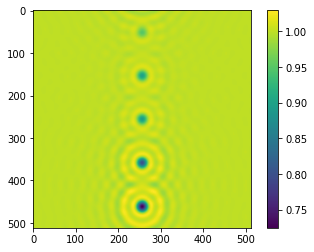

In [104]:
plt.imshow(intensity)
plt.colorbar()

[########################################] | 100% Completed |  0.2s


(<Figure size 432x288 with 2 Axes>, <Axes:xlabel='x [Å]', ylabel='y [Å]'>)

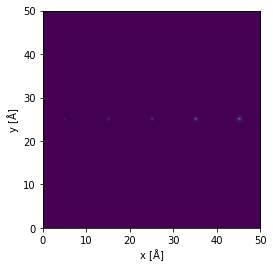

In [88]:
potential.show()

In [80]:
ctf = abtem.CTF(
               semiangle_cutoff=[5.,11.],
               energy=80e3
               )

probe = abtem.Probe(energy=80e3, gpts=32, extent=20., semiangle_cutoff=30).build()

blocks = ctf.ensemble_blocks(1).compute()
for i in np.ndindex(blocks.shape):
    blocks[i] = blocks[i].evaluate(probe)

array = ctf.evaluate(probe)

blocks = concatenate_array_blocks(blocks)


#ctf.evalute(probe)

(0,)
(0,)


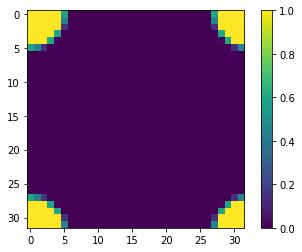

In [81]:
plt.imshow(np.abs(array[1]) ** 2)
plt.colorbar()

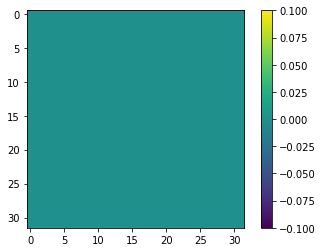

In [42]:
plt.imshow(np.abs(blocks[1])-np.abs(array[1]))
plt.colorbar()